# Topic Models

Topic Model is a type of statistical language model used to uncover hidden structure in a collection of texts.   
Topic modeling is unsupervised learning.   
LDA is a topic modeling algorithm.  

# 1. LDA (Latent Dirichlet Allocation)

<a href='LDA.jpg' target='_blank'>https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0</a>

### 潜在狄氏配置

We can describe the generative process of LDA as, given the M number of documents, N number of words, and prior K number of topics, the model trains to output:

    psi ($\psi$), the distribution of words for each topic K
    phi ($\phi$), the distribution of topics for each document i
    
Parameters of LDA
    
    Alpha parameter is Dirichlet prior concentration parameter that represents document-topic density — with a higher alpha, documents are assumed to be made up of more topics and result in more specific topic distribution per document.

    Beta parameter is the same prior concentration parameter that represents topic-word density — with high beta, topics are assumed to made of up most of the words and result in a more specific word distribution per topic.

### LDA as Dimensionality Reduction

Rather than representing a text T in its feature space as {Word_i: count(Word_i, T) for Word_i in Vocabulary}, you can represent it in a topic space as {Topic_i: Weight(Topic_i, T) for Topic_i in Topics}

### LDA as clustering

By doing topic modeling, we build clusters of words rather than clusters of texts. A text is thus a mixture of all the topics, each having a specific weight.   

Both K-means and Latent Dirichlet Allocation (LDA) are unsupervised learning algorithms, where the user needs to decide a priori the parameter K, respectively the number of clusters and the number of topics.

If both are applied to assign K topics to a set of N documents, the most evident difference is that K-means is going to partition the N documents in K disjoint clusters (i.e. topics in this case). On the other hand, LDA assigns a document to a mixture of topics. Therefore each document is characterized by one or more topics (e.g. Document D belongs for 60% to Topic A, 30% to topic B and 10% to topic E). Hence, LDA can give more realistic results than k-means for topic assignment.


K-means is hard clustering and GMM is soft clustering as LDA. In most cases with LDA and GMM you will have better results than with K-means in topic detection, just because GMM and LDA better model the problem where single document may belong to several different topics.

### topic modeling

There are several existing algorithms you can use to perform the topic modeling. The most common of it are,   
    
    Latent Semantic Analysis (LSA/LSI), 
    Probabilistic Latent Semantic Analysis (pLSA), 
    Latent Dirichlet Allocation (LDA)

## 1.1 Loading data

载入reuters数据集： 

X矩阵为395*4258，共395个文档，4258个单词，用于计算每行文档单词出现的次数（词频）  
vocab为4258个单词，对应X的一行数据。如X中第0列对应church的词频。  
titles为文章标题，共395篇文章

In [2]:
import numpy as np  
import lda  
import lda.datasets  
  
# document-term matrix  
X = lda.datasets.load_reuters()
print("X shape: {}\n".format(X.shape))  
print(X[:5, :5])  
  
# the vocab  
vocab = lda.datasets.load_reuters_vocab()   
print("len(vocab): {}\n".format(len(vocab)))  
print(vocab[:5])  

# titles for each story  
titles = lda.datasets.load_reuters_titles()  
print("len(titles): {}\n".format(len(titles)))  
print(titles[:5])  

X shape: (395, 4258)

[[ 1  0  1  0  0]
 [ 7  0  2  0  0]
 [ 0  0  0  1 10]
 [ 6  0  1  0  0]
 [ 0  0  0  2 14]]
len(vocab): 4258

('church', 'pope', 'years', 'people', 'mother')
len(titles): 395

('0 UK: Prince Charles spearheads British royal revolution. LONDON 1996-08-20', '1 GERMANY: Historic Dresden church rising from WW2 ashes. DRESDEN, Germany 1996-08-21', "2 INDIA: Mother Teresa's condition said still unstable. CALCUTTA 1996-08-23", '3 UK: Palace warns British weekly over Charles pictures. LONDON 1996-08-25', '4 INDIA: Mother Teresa, slightly stronger, blesses nuns. CALCUTTA 1996-08-25')


查看数据样例

In [4]:
# X[0,3117] is the number of times that word 3117 occurs in document 0  
doc_id = 0  
word_id = 3117  
print("doc id: {} word id: {}".format(doc_id, word_id))  
print("-- count: {}".format(X[doc_id, word_id]))  
print("-- word : {}".format(vocab[word_id]))  
print("-- doc title  : {}".format(titles[doc_id]))  

doc id: 0 word id: 3117
-- count: 2
-- word : heir-to-the-throne
-- doc title  : 0 UK: Prince Charles spearheads British royal revolution. LONDON 1996-08-20


## 1.2 训练模型
设置20个主题，500次迭代

In [9]:
model = lda.LDA(n_topics=20, n_iter=1000, random_state=1)  
Xt = model.fit_transform(X) # is also available 

INFO:lda:n_documents: 395
INFO:lda:vocab_size: 4258
INFO:lda:n_words: 84010
INFO:lda:n_topics: 20
INFO:lda:n_iter: 1000
INFO:lda:<0> log likelihood: -1051748
INFO:lda:<10> log likelihood: -719800
INFO:lda:<20> log likelihood: -699115
INFO:lda:<30> log likelihood: -689370
INFO:lda:<40> log likelihood: -684918
INFO:lda:<50> log likelihood: -681322
INFO:lda:<60> log likelihood: -678979
INFO:lda:<70> log likelihood: -676598
INFO:lda:<80> log likelihood: -675383
INFO:lda:<90> log likelihood: -673316
INFO:lda:<100> log likelihood: -672761
INFO:lda:<110> log likelihood: -671320
INFO:lda:<120> log likelihood: -669744
INFO:lda:<130> log likelihood: -669292
INFO:lda:<140> log likelihood: -667940
INFO:lda:<150> log likelihood: -668038
INFO:lda:<160> log likelihood: -667429
INFO:lda:<170> log likelihood: -666475
INFO:lda:<180> log likelihood: -665562
INFO:lda:<190> log likelihood: -664920
INFO:lda:<200> log likelihood: -664979
INFO:lda:<210> log likelihood: -664722
INFO:lda:<220> log likelihood: -

The returned Xt from `fit_transform` has the shape (n_doc, n_topics).  
Each row of Xt is the distribution of one document among the 20 topics.

In [13]:
X.shape, Xt.shape 

((395, 4258), (395, 20))

## 1.3 主题-单词（Topic-Word）分布


In [21]:
topic_word = model.topic_word_  
print("topic_word shape: {}".format(topic_word.shape)) 

np.sum(topic_word, axis = 1)

topic_word shape: (20, 4258)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

`topic_word` 矩阵相当于PCA的component loadings, Matrix Factorization中的 $P^T$ (P是投影矩阵)，表示了20个topic（主成分）的loadings。   
每一个topic的loadings满足归一化。

In [24]:
# 计算各主题Top-N个单词

topic_top_n_words = []

n = 5  
for i, topic_dist in enumerate(topic_word):  
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n+1):-1]  
    s = '*Topic {}\t- {}'.format(i, ' '.join(topic_words))
    print(s)
    topic_top_n_words.append(s)    

*Topic 0	- british churchill million sale letters
*Topic 1	- church government people country political
*Topic 2	- elvis king fans presley death
*Topic 3	- yeltsin russian russia president kremlin
*Topic 4	- pope vatican surgery pontiff john
*Topic 5	- funeral family versace police miami
*Topic 6	- simpson court years born former
*Topic 7	- order mother successor election nuns
*Topic 8	- charles prince diana royal queen
*Topic 9	- film french france against paris
*Topic 10	- germany war german nazi book
*Topic 11	- east peace prize award timor
*Topic 12	- n't people life show told
*Topic 13	- years church last world time
*Topic 14	- mother teresa heart charity calcutta
*Topic 15	- city capital cultural salonika buddhist
*Topic 16	- music people first tour year
*Topic 17	- church catholic bernardin cardinal bishop
*Topic 18	- harriman clinton u.s president paris
*Topic 19	- century art exhibition museum churches


### 1.3.1 可视化：各个主题中单词权重分布

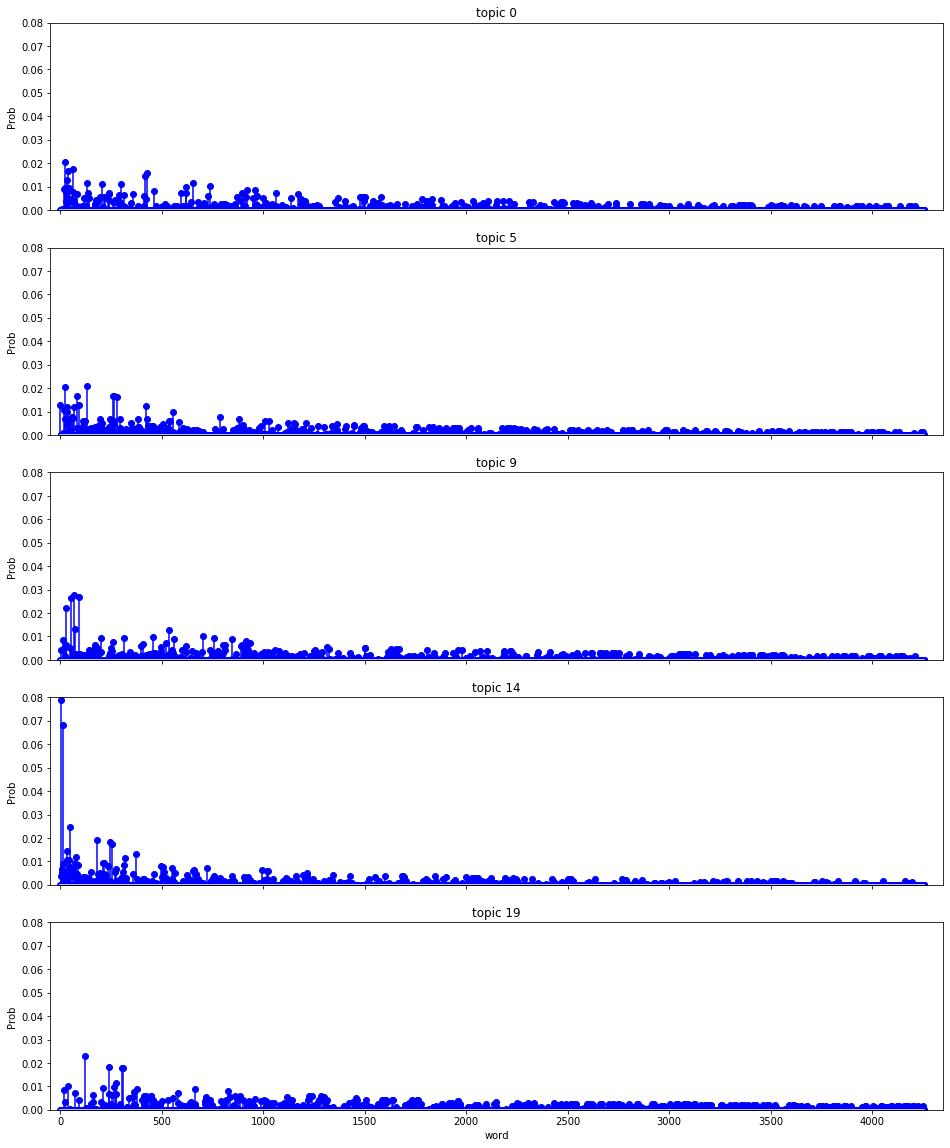

In [34]:
import matplotlib.pyplot as plt  
%matplotlib inline
f, ax= plt.subplots(5, 1, figsize=(16, 20), sharex=True)  
for i, k in enumerate([0, 5, 9, 14, 19]):  
    ax[i].stem(topic_word[k,:], linefmt='b-',  
               markerfmt='bo', basefmt='w-',
              use_line_collection = True)  
    ax[i].set_xlim(-50,4350)  
    ax[i].set_ylim(0, 0.08)  
    ax[i].set_ylabel("Prob")  
    ax[i].set_title("topic {}".format(k))  

ax[4].set_xlabel("word")  
  
# plt.tight_layout()  
plt.show()  

### 1.3.2 对隶属于特定主题的文档(标题)进行词云可视化 

In [57]:
topic_idx = 14

topics_most_pr = doc_topic.argmax(axis = 1)
print(topic_top_n_words[topic_idx])
print('特蕾莎修女，（Mother Teresa），是世界著名的天主教慈善工作者，主要替印度加尔各答的穷人服务。因其一生奉献给解除贫困，而于1979年得到诺贝尔和平奖。并被教皇约翰·保罗二世在2003年10月列入了天主教宣福名单Beatification。目前德蕾莎修女的名称也变为真福德雷莎修女(BlessedTeresa）。')
print(np.array(titles)[topics_most_pr == topic_idx])

*Topic 14	- mother teresa heart charity calcutta
特蕾莎修女，（Mother Teresa），是世界著名的天主教慈善工作者，主要替印度加尔各答的穷人服务。因其一生奉献给解除贫困，而于1979年得到诺贝尔和平奖。并被教皇约翰·保罗二世在2003年10月列入了天主教宣福名单Beatification。目前德蕾莎修女的名称也变为真福德雷莎修女(BlessedTeresa）。
["2 INDIA: Mother Teresa's condition said still unstable. CALCUTTA 1996-08-23"
 '4 INDIA: Mother Teresa, slightly stronger, blesses nuns. CALCUTTA 1996-08-25'
 "5 INDIA: Mother Teresa's condition unchanged, thousands pray. CALCUTTA 1996-08-25"
 '6 INDIA: Mother Teresa shows signs of strength, blesses nuns. CALCUTTA 1996-08-26'
 "7 INDIA: Mother Teresa's condition improves, many pray. CALCUTTA, India 1996-08-25"
 '8 INDIA: Mother Teresa improves, nuns pray for "miracle". CALCUTTA 1996-08-26'
 '12 INDIA: Mother Teresa ("I want to go home") sits and prays. CALCUTTA 1996-08-28'
 '13 INDIA: Mother Teresa nears end of crisis, nuns rejoice. CALCUTTA 1996-08-28'
 '40 USA: U.S. House of Representatives honors Mother Teresa. WASHINGTON 1996-09-17'
 '127 INDIA: Mother Teresa becomes honorar

0个假阳性

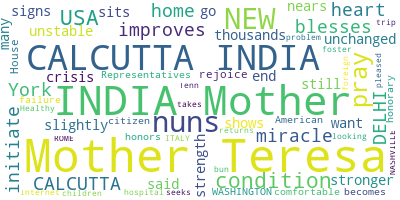

In [58]:
# Import the wordcloud library
from wordcloud import WordCloud# Join the different processed titles together.
long_string = ','.join(list(np.array(titles)[topics_most_pr == 14]))# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

## 1.4 文档-主题（Document-Topic）分布


In [29]:
doc_topic = model.doc_topic_ 
print("doc_topic shape: {}".format(doc_topic.shape))  
np.sum(doc_topic, axis = 1)

doc_topic shape: (395, 20)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

doc_topic 表示了395个文章的主题分布。
每一个doc的主题分布概率满足归一化。

In [30]:
# 输出每个文章的最大概率主题

for n in range(10):  
    topic_most_pr = doc_topic[n].argmax()  
    print("{} \ndoc: {}\n".format(topic_top_n_words[topic_most_pr], titles[n]))  

*Topic 8	- charles prince diana royal queen 
doc: 0 UK: Prince Charles spearheads British royal revolution. LONDON 1996-08-20

*Topic 1	- church government people country political 
doc: 1 GERMANY: Historic Dresden church rising from WW2 ashes. DRESDEN, Germany 1996-08-21

*Topic 14	- mother teresa heart charity calcutta 
doc: 2 INDIA: Mother Teresa's condition said still unstable. CALCUTTA 1996-08-23

*Topic 8	- charles prince diana royal queen 
doc: 3 UK: Palace warns British weekly over Charles pictures. LONDON 1996-08-25

*Topic 14	- mother teresa heart charity calcutta 
doc: 4 INDIA: Mother Teresa, slightly stronger, blesses nuns. CALCUTTA 1996-08-25

*Topic 14	- mother teresa heart charity calcutta 
doc: 5 INDIA: Mother Teresa's condition unchanged, thousands pray. CALCUTTA 1996-08-25

*Topic 14	- mother teresa heart charity calcutta 
doc: 6 INDIA: Mother Teresa shows signs of strength, blesses nuns. CALCUTTA 1996-08-26

*Topic 14	- mother teresa heart charity calcutta 
doc: 7 IN

### 1.4.1 可视化：各文档在多个主题中的分布情况

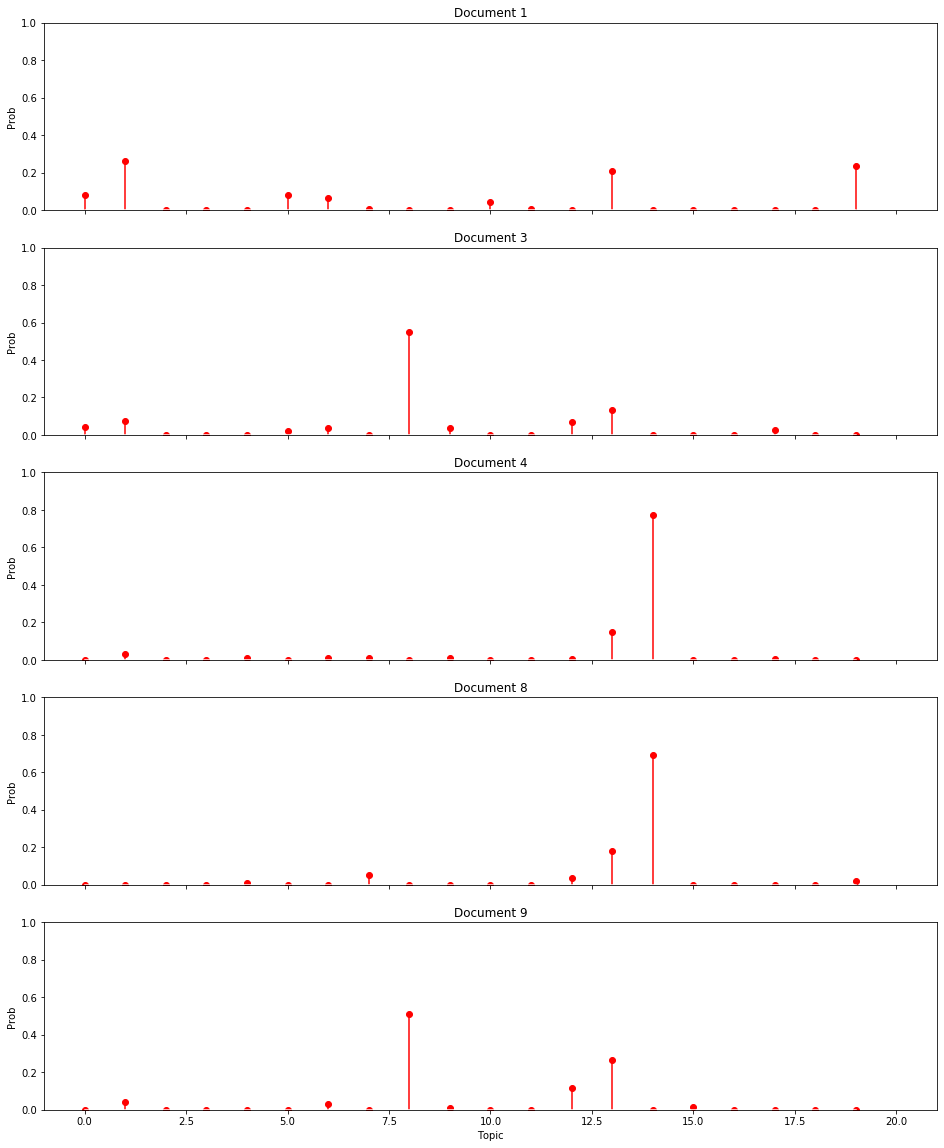

In [35]:
import matplotlib.pyplot as plt  
%matplotlib inline
f, ax= plt.subplots(5, 1, figsize=(16, 20), sharex=True)  
for i, k in enumerate([1, 3, 4, 8, 9]):  
    ax[i].stem(doc_topic[k,:], linefmt='r-',  
               markerfmt='ro', basefmt='w-',
              use_line_collection = True)  
    ax[i].set_xlim(-1, 21)  
    ax[i].set_ylim(0, 1)  
    ax[i].set_ylabel("Prob")  
    ax[i].set_title("Document {}".format(k))   
ax[4].set_xlabel("Topic")  
  
plt.show()  

# 1.5 Hyper-parameter Optimization by Perplexity

perplexity is just an exponentiation of the entropy!

Entropy is the average number of bits to encode the information contained in a random variable, so the exponentiation of the entropy should be the total amount of all possible information, or more precisely, the weighted average number of choices a random variable has.

For example, if the average sentence in the test set could be coded in 100 bits, the model perplexity is 2¹⁰⁰ per sentence.

<img src="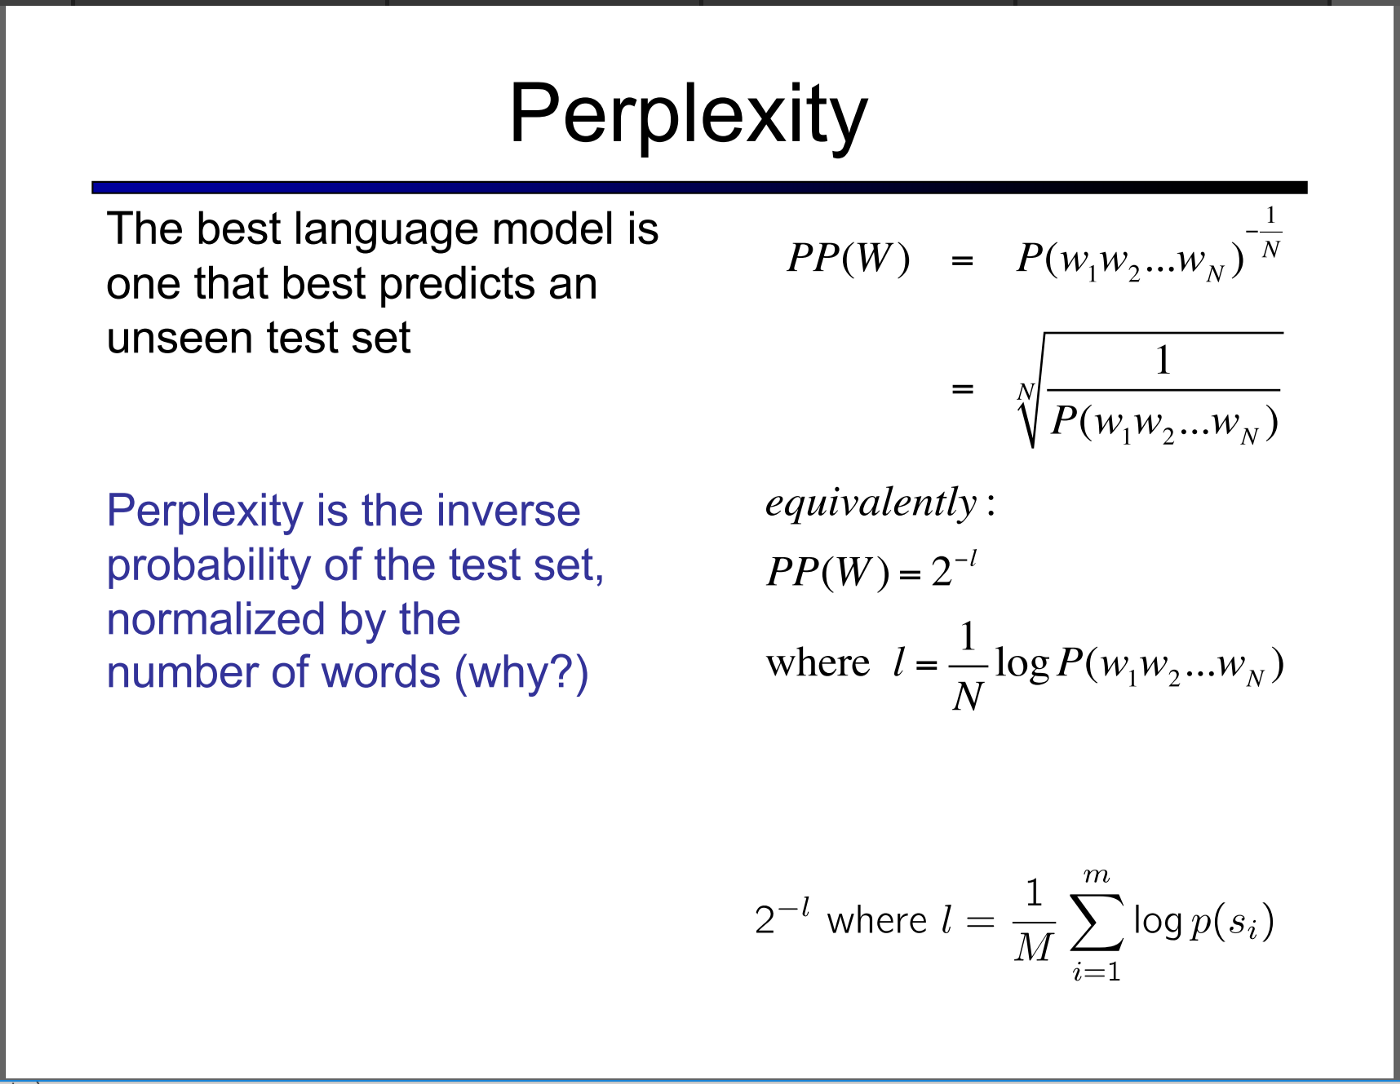
">

# 2. Non-Negative Matrix Factorization

X = WH

    X is mxn
    W is mxk, k is number of latent topics
    H is kxn 

Refer to [`/codex/py/machine learning/source/10. Matrix Factorization/NMF.ipynb`]

In [67]:
from sklearn import decomposition

n_topics = 20

estimator = decomposition.NMF(n_components=n_topics, init='nndsvda', tol=5e-3) #  NNDSVDa（全部零值替换为所有元素的平均值）和 NNDSVDar（零值替换为比数据平均值除以100 小的随机扰动）
estimator.fit(X)
H = estimator.components_
W = estimator.transform(X)

W.shape, H.shape, doc_topic.shape, topic_word.shape

((395, 20), (20, 4258), (395, 20), (20, 4258))

NMF分解得到的W相当于doc_topic矩阵，H相当于topic_word矩阵

## 2.1 主题-单词（Topic-Word）分布

In [68]:
# 计算各主题Top-N个单词

topic_top_n_words_nmf = []

n = 5  
for i, topic_dist in enumerate(H):  
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n+1):-1]  
    s = '*Topic {}\t- {}'.format(i, ' '.join(topic_words))
    print(s)
    topic_top_n_words_nmf.append(s)    

*Topic 0	- show people ellen gay come
*Topic 1	- pope vatican surgery hospital pontiff
*Topic 2	- mother teresa order heart calcutta
*Topic 3	- elvis king fans presley concert
*Topic 4	- charles diana bowles parker camilla
*Topic 5	- harriman u.s clinton churchill ambassador
*Topic 6	- yeltsin operation kremlin president russian
*Topic 7	- miami cunanan versace police beach
*Topic 8	- city salonika byzantine cultural capital
*Topic 9	- prince king bertil royal sweden
*Topic 10	- east timor indonesia peace prize
*Topic 11	- simpson public years football court
*Topic 12	- church bernardin catholic wright bishop
*Topic 13	- king government michael romania president
*Topic 14	- stalin radzinsky russian book soviet
*Topic 15	- film festival director flynt poster
*Topic 16	- says percent advertising company market
*Topic 17	- bardot against french france moslem
*Topic 18	- quebec bourassa irish canadian political
*Topic 19	- germany letter german scientology kohl


# 2.2 查看隶属于特定主题的文档

In [69]:
topic_idx = 2 # NMF的结果中，Topic 2对应Teresa

topics_most_pr = W.argmax(axis = 1)
print(topic_top_n_words_nmf[topic_idx])
print('特蕾莎修女，（Mother Teresa），是世界著名的天主教慈善工作者，主要替印度加尔各答的穷人服务。因其一生奉献给解除贫困，而于1979年得到诺贝尔和平奖。并被教皇约翰·保罗二世在2003年10月列入了天主教宣福名单Beatification。目前德蕾莎修女的名称也变为真福德雷莎修女(BlessedTeresa）。')
print(np.array(titles)[topics_most_pr == topic_idx])

*Topic 2	- mother teresa order heart calcutta
特蕾莎修女，（Mother Teresa），是世界著名的天主教慈善工作者，主要替印度加尔各答的穷人服务。因其一生奉献给解除贫困，而于1979年得到诺贝尔和平奖。并被教皇约翰·保罗二世在2003年10月列入了天主教宣福名单Beatification。目前德蕾莎修女的名称也变为真福德雷莎修女(BlessedTeresa）。
["2 INDIA: Mother Teresa's condition said still unstable. CALCUTTA 1996-08-23"
 '4 INDIA: Mother Teresa, slightly stronger, blesses nuns. CALCUTTA 1996-08-25'
 "5 INDIA: Mother Teresa's condition unchanged, thousands pray. CALCUTTA 1996-08-25"
 '6 INDIA: Mother Teresa shows signs of strength, blesses nuns. CALCUTTA 1996-08-26'
 "7 INDIA: Mother Teresa's condition improves, many pray. CALCUTTA, India 1996-08-25"
 '8 INDIA: Mother Teresa improves, nuns pray for "miracle". CALCUTTA 1996-08-26'
 '12 INDIA: Mother Teresa ("I want to go home") sits and prays. CALCUTTA 1996-08-28'
 '13 INDIA: Mother Teresa nears end of crisis, nuns rejoice. CALCUTTA 1996-08-28'
 '40 USA: U.S. House of Representatives honors Mother Teresa. WASHINGTON 1996-09-17'
 '89 USA: Madonna as mother - the next chapte

3个假阳性，但查全率比LDA高

# 3 Clustering

Clustering可以使用原始的DTM（Document-Term Matrix）矩阵或TF-IDF矩阵。对比效果，TF-IDF矩阵普遍优于DTM

## 3.1 计算TF-IDF矩阵

[`codex/py/NLP/TF-IDF.ipynb`]

X 为 DTM (document-term matrix), shape = (n_doc, n_word)

In [165]:
from scipy.sparse.csr import csr_matrix
    
def tf_idf_matrix(X, IDF = None):

    # convert X to np array if it is a csr matrix
    # Following matrix operations require that.
    if isinstance(X, csr_matrix):
        X = X.A

    if IDF is None:
        # (X>0).sum(axis = 0) 得到每列>0的元素数目，即|{d∈D:t∈d}|
        IDF = np.log((1+X.shape[0])/(1 + (X>0).sum(axis = 0)))+1
        
    TF_IDF = X * IDF
    
    return TF_IDF, IDF

In [166]:
TF_IDF, IDF = tf_idf_matrix(X)

# 3.2 聚类

## 3.2.1 GMM (Gaussian mixture model)

[`codex/py/machine learning/source/9. Clustering/GMM.ipynb`]

In [104]:
# 如果对DTM聚类，将TF_IDF替换为X
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=n_topics)
gmm.fit(TF_IDF)
labels = gmm.predict(TF_IDF)
probs = gmm.predict_proba(TF_IDF) # np.max(gmm.predict_proba(X), axis = 1)

*Topic 0	- pope vatican pontiff health mass
*Topic 1	- miami versace cunanan beach police
*Topic 2	- yeltsin operation kremlin chernomyrdin russian
*Topic 3	- pope poles economic trip political
*Topic 4	- tudjman croatian president cancer officials
*Topic 5	- salonika byzantine city cultural venizelos
*Topic 6	- teresa mother order calcutta missionaries
*Topic 7	- elvis fans presley king graceland
*Topic 8	- vanunu nuclear israel israeli dimona
*Topic 9	- harriman church u.s clinton president
*Topic 10	- beetham credit social rangitikei mp
*Topic 11	- stalin radzinsky russian book soviet
*Topic 12	- disney baptists southern subsidiaries boycott
*Topic 13	- pope crucitti operation surgery tumour
*Topic 14	- mother teresa sen respirator heart
*Topic 15	- teresa nirmala mother order sister
*Topic 16	- charles diana bowles parker camilla
*Topic 17	- simpson football nicole court civil
*Topic 18	- exhibition csu munich ude wehrmacht
*Topic 19	- king family speech property legacy


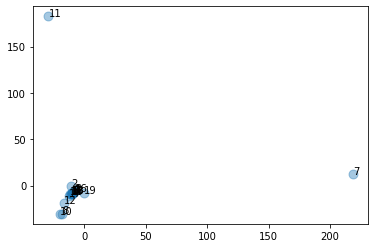

In [105]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
C_2 = pca.fit_transform(gmm.means_)
plt.scatter([C_2[:,0]], [C_2[:,1]], s=80, alpha = .4)
    
# 计算各聚类中心的Top-N个单词
topic_top_n_words_gmm = []

n = 5  
for i, topic_dist in enumerate(gmm.means_):  
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n+1):-1]  
    s = '*Topic {}\t- {}'.format(i, ' '.join(topic_words))
    print(s)
    topic_top_n_words_gmm.append(s)   
    plt.annotate(str(i),(C_2[i,0], C_2[i,1]))

In [107]:
topic_idx = 15

print(topic_top_n_words_gmm[topic_idx])
print('特蕾莎修女，（Mother Teresa），是世界著名的天主教慈善工作者，主要替印度加尔各答的穷人服务。因其一生奉献给解除贫困，而于1979年得到诺贝尔和平奖。并被教皇约翰·保罗二世在2003年10月列入了天主教宣福名单Beatification。目前德蕾莎修女的名称也变为真福德雷莎修女(BlessedTeresa）。')
print(np.array(titles)[labels == topic_idx])

*Topic 15	- teresa nirmala mother order sister
特蕾莎修女，（Mother Teresa），是世界著名的天主教慈善工作者，主要替印度加尔各答的穷人服务。因其一生奉献给解除贫困，而于1979年得到诺贝尔和平奖。并被教皇约翰·保罗二世在2003年10月列入了天主教宣福名单Beatification。目前德蕾莎修女的名称也变为真福德雷莎修女(BlessedTeresa）。
["252 INDIA: Nuns to elect Mother Teresa's successor any day. CALCUTTA 1997-03-06"
 '259 INDIA: Hindu Brahmin convert to succeed Mother Teresa. CALCUTTA, India 1997-03-13'
 "260 INDIA: Shy nun emerges from Mother Teresa's shadow. CALCUTTA, India 1997-03-13"
 "263 INDIA: Mother Teresa's successor faces bumpy start. CALCUTTA, India 1997-03-16"]


## 3.2.2 K-Means

In [100]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=n_topics)
km.fit(TF_IDF)
labels = km.predict(TF_IDF)

for i, row in enumerate(km.cluster_centers_):
    print('===Center %d===' % (i+1))
    for idx in np.where(row>2)[0]:
        print(idx, np.array(vocab)[idx], round(row[idx],3))

===Center 1===
0 church 2.4
12 charles 28.423
18 public 5.322
21 family 4.349
22 king 3.806
24 british 3.182
39 prince 12.857
53 party 2.152
60 diana 15.663
61 royal 9.784
80 queen 8.611
95 marriage 6.308
102 love 3.895
124 parker 13.953
126 bowles 13.953
131 britain 2.705
132 newspaper 3.141
134 camilla 13.639
141 media 2.12
158 woman 2.767
171 england 3.99
174 princess 5.31
189 throne 4.663
251 couple 2.859
276 palace 3.516
280 divorce 7.146
334 future 2.859
343 marry 3.049
344 relationship 2.832
350 divorced 2.744
382 daily 2.508
390 opinion 2.627
451 affair 2.508
560 monarchy 3.486
728 elizabeth 2.822
741 heir 2.327
795 britons 4.037
855 monarch 2.046
881 sun 2.42
1036 runcie 4.663
1259 buckingham 2.623
1548 wales 2.248
1558 blair 2.308
1660 mistress 2.292
1707 royals 2.379
1993 adultery 2.101
===Center 2===
25 harriman 2.578
===Center 3===
2 years 3.185
6 told 3.437
9 year 4.186
17 city 24.725
18 public 4.405
19 time 2.019
20 since 3.341
22 king 2.854
29 made 3.46
32 minister 2.41

26 against 4.526
27 country 8.946
29 made 2.076
36 government 2.449
37 n't 2.438
42 war 2.612
45 day 7.346
51 later 2.318
57 sunday 7.445
64 official 2.625
65 service 2.691
67 film 16.589
68 while 2.386
70 left 2.449
86 next 2.504
89 long 2.527
91 month 2.551
106 own 2.638
108 says 2.807
110 never 5.437
114 held 2.625
117 called 2.677
118 off 2.691
121 whose 2.625
128 officials 2.747
131 britain 2.823
132 newspaper 2.792
136 age 2.777
154 few 2.719
158 woman 2.887
160 times 8.468
169 come 2.956
170 taken 2.747
176 rome 3.153
179 both 2.747
188 local 2.974
192 christian 3.153
193 reuters 2.807
196 reports 2.974
197 states 2.974
204 earlier 2.807
215 court 3.318
217 know 5.912
221 came 2.921
222 right 2.992
229 conference 3.069
230 think 2.956
236 gave 2.974
238 town 3.197
241 campaign 3.131
261 wrote 6.44
307 letter 7.607
314 secret 9.954
315 festival 3.89
316 quoted 3.268
331 chief 3.22
335 nazi 3.763
336 despite 3.131
355 countries 3.175
357 southern 3.485
358 security 6.796
370 inter

3231 stole 2.686
3285 connection 3.777
3295 county 3.777
3338 patrick 6.487
3441 72 2.518
3537 magazines 3.777
3561 cafe 3.892
3588 elton 4.029
3623 fun 2.595
3640 ocean 3.892
3671 garage 2.595
3766 patrons 4.029
3785 assassin 2.595
3792 distributed 2.595
3803 charming 3.892
3842 spree 4.029
3851 resident 2.595
4005 spanish-style 3.892
4027 sting 4.029
4045 tycoon 2.595
4204 alfonso 4.029
===Center 10===
7 first 5.283
15 life 6.412
16 u.s 2.46
19 time 2.019
22 king 25.689
29 made 2.076
34 died 2.299
48 heart 2.677
55 death 9.971
58 elvis 207.586
65 service 2.691
66 including 2.396
67 film 3.318
69 week 4.963
70 left 2.449
83 national 2.539
86 next 2.504
92 thursday 2.575
102 love 5.842
108 says 5.614
117 called 8.032
125 four 2.691
129 united 2.719
130 among 2.612
133 funeral 3.03
136 age 5.553
139 religious 2.904
143 women 2.974
163 trip 6.585
167 international 6.139
168 won 2.904
177 saturday 2.887
178 end 2.777
186 born 2.974
190 white 3.011
197 states 2.974
210 used 5.948
218 music

1293 language 4.209
1295 korea 5.036
1309 perhaps 4.273
1310 economy 4.273
1332 liberal 4.342
1349 democracy 4.273
1368 radzinsky 94.324
1378 dictator 4.273
1384 tell 4.209
1392 40 4.209
1396 eve 8.993
1402 student 4.342
1419 version 4.342
1447 research 4.273
1458 denounced 4.273
1463 created 8.547
1466 conflict 4.497
1477 entered 4.273
1479 turning 4.497
1483 historian 8.833
1570 historical 4.584
1626 room 4.342
1704 empire 4.497
1734 romanov 10.071
1769 ask 4.679
1773 claim 4.416
1808 access 4.497
1821 remote 4.497
1824 humour 4.584
1857 beyond 4.584
1952 corruption 4.902
2001 czech 4.584
2020 alone 4.584
2052 regarded 4.584
2096 fresh 4.584
2099 vladimir 4.784
2171 nobody 9.804
2179 collapsed 4.679
2256 collapse 4.679
2265 charm 4.679
2269 leftist 4.679
2284 dramatic 4.679
2291 available 4.679
2327 population 4.784
2328 regime 4.784
2345 writing 4.679
2364 rural 4.784
2392 camps 4.784
2418 authority 5.036
2466 archive 5.036
2479 seeks 4.784
2514 reaction 5.036
2519 ideals 4.784
2530

10 president 2.114
17 city 2.318
18 public 2.202
20 since 6.014
26 against 2.263
27 country 6.709
28 vatican 9.149
33 home 4.655
36 government 2.449
38 million 2.396
40 john 2.211
41 very 4.693
45 day 6.53
46 political 10.398
62 wednesday 2.493
68 while 2.386
70 left 3.265
73 around 2.504
75 saying 2.504
76 take 2.612
88 paul 2.575
92 thursday 2.575
105 became 2.638
106 own 2.638
107 spokesman 2.677
113 bishop 3.197
118 off 3.588
119 father 2.921
128 officials 3.663
145 until 2.705
151 children 2.921
163 trip 9.878
164 union 2.938
173 become 2.777
177 saturday 5.774
179 both 2.747
180 asked 2.823
220 help 3.03
241 campaign 3.131
250 without 3.03
284 poland 7.031
285 nation 6.536
294 priest 3.244
296 again 3.11
300 1994 3.244
301 economic 17.425
305 europe 3.244
325 june 3.197
334 future 3.268
339 whether 3.244
346 series 6.44
355 countries 3.175
358 security 3.398
359 small 2.247
368 hours 2.195
378 young 3.344
386 near 3.22
410 10 3.268
433 european 3.516
450 september 3.485
453 socia

*Topic 0	- charles diana parker bowles camilla
*Topic 1	- harriman church people clinton president
*Topic 2	- salonika byzantine city cultural venizelos
*Topic 3	- bernardin cardinal chicago cancer archdiocese
*Topic 4	- voodoo haiti cosentino sacred arts
*Topic 5	- vanunu nuclear israel israeli dimona
*Topic 6	- pope vatican surgery pontiff appendix
*Topic 7	- says advertising market company internet
*Topic 8	- miami versace cunanan beach police
*Topic 9	- elvis fans presley king chadwick
*Topic 10	- duke bahamas windsor king germans
*Topic 11	- teresa mother order missionaries calcutta
*Topic 12	- stalin radzinsky russian book soviet
*Topic 13	- tsar bones remains nicholas bury
*Topic 14	- topless houston dancers industry club
*Topic 15	- bardot b.b cinema fame against
*Topic 16	- pope poles economic tatra political
*Topic 17	- quebec bourassa canadian premier provincial
*Topic 18	- yeltsin operation kremlin chernomyrdin russian
*Topic 19	- prince bertil gustaf sweden lilian


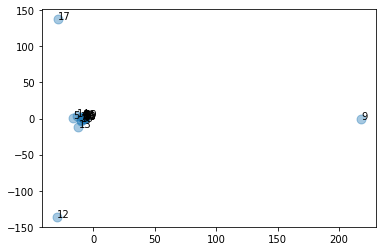

In [101]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
C_2 = pca.fit_transform(km.cluster_centers_)
plt.scatter([C_2[:,0]], [C_2[:,1]], s=80, alpha = .4)
    
# 计算各聚类中心的Top-N个单词
topic_top_n_words_km = []

n = 5  
for i, topic_dist in enumerate(km.cluster_centers_):  
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n+1):-1]  
    s = '*Topic {}\t- {}'.format(i, ' '.join(topic_words))
    print(s)
    topic_top_n_words_km.append(s)   
    plt.annotate(str(i),(C_2[i,0], C_2[i,1]))

In [103]:
topic_idx = 11

print(topic_top_n_words_km[topic_idx])
print('特蕾莎修女，（Mother Teresa），是世界著名的天主教慈善工作者，主要替印度加尔各答的穷人服务。因其一生奉献给解除贫困，而于1979年得到诺贝尔和平奖。并被教皇约翰·保罗二世在2003年10月列入了天主教宣福名单Beatification。目前德蕾莎修女的名称也变为真福德雷莎修女(BlessedTeresa）。')
print(np.array(titles)[labels == topic_idx])

*Topic 11	- teresa mother order missionaries calcutta
特蕾莎修女，（Mother Teresa），是世界著名的天主教慈善工作者，主要替印度加尔各答的穷人服务。因其一生奉献给解除贫困，而于1979年得到诺贝尔和平奖。并被教皇约翰·保罗二世在2003年10月列入了天主教宣福名单Beatification。目前德蕾莎修女的名称也变为真福德雷莎修女(BlessedTeresa）。
["2 INDIA: Mother Teresa's condition said still unstable. CALCUTTA 1996-08-23"
 '4 INDIA: Mother Teresa, slightly stronger, blesses nuns. CALCUTTA 1996-08-25'
 "5 INDIA: Mother Teresa's condition unchanged, thousands pray. CALCUTTA 1996-08-25"
 '6 INDIA: Mother Teresa shows signs of strength, blesses nuns. CALCUTTA 1996-08-26'
 "7 INDIA: Mother Teresa's condition improves, many pray. CALCUTTA, India 1996-08-25"
 '8 INDIA: Mother Teresa improves, nuns pray for "miracle". CALCUTTA 1996-08-26'
 '12 INDIA: Mother Teresa ("I want to go home") sits and prays. CALCUTTA 1996-08-28'
 '13 INDIA: Mother Teresa nears end of crisis, nuns rejoice. CALCUTTA 1996-08-28'
 '127 INDIA: Mother Teresa becomes honorary American citizen. NEW DELHI 1996-11-16'
 '132 INDIA: Mother Teresa "comfortabl

结果全部正确。K-Means效果优于GMM

In [162]:
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm
          

text = 'Vladimir Putin held a working meeting with the leadership of the Central Election Commission and members of the working group on developing proposals for amending the Constitution.'
# vectorizer = CountVectorizer(vocabulary = vocab)
# a = vectorizer.fit_transform([text]).A.T

bow = np.zeros(len(vocab))

for w in text.split():
    if w in vocab:
        bow[vocab.index(w)] += 1

IDF = np.log((1+X.shape[0])/(1+ (X>0).sum(axis = 0)))+1  # |T|
tf_idf = []
for i in range(len(IDF)):
    tf_idf.append(bow[i]*IDF[i])
    if bow[i] > 0:
        print(vocab[i])
    
a = np.array(tf_idf).reshape(1,-1) 
print(km.predict(a))
print(topic_top_n_words_km[1])

group
held
members
meeting
working
leadership
developing
[1]
*Topic 1	- harriman church people clinton president
